In [3]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sn
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
cd=pd.read_csv('crime_data.csv')

In [5]:
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
cd.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [7]:
cd.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
cd.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [10]:
cd.shape

(50, 5)

In [11]:
cd.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [12]:
cd.duplicated().sum()

0

In [15]:
cd1=cd.drop('Unnamed: 0',axis=1)

In [18]:
cd1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [21]:
std_scaler=StandardScaler()
cd_scaler=std_scaler.fit_transform(cd1)
cd_scaler=pd.DataFrame(cd1)
cd_scaler

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


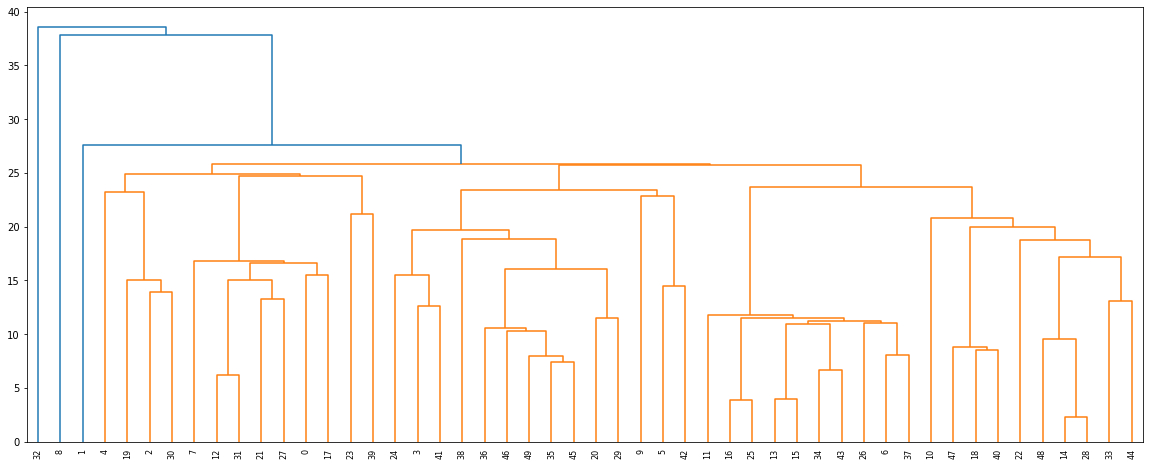

In [23]:
plt.figure(figsize=(20,8))
cd1=sch.dendrogram(sch.linkage(cd_scaler,method='single'))

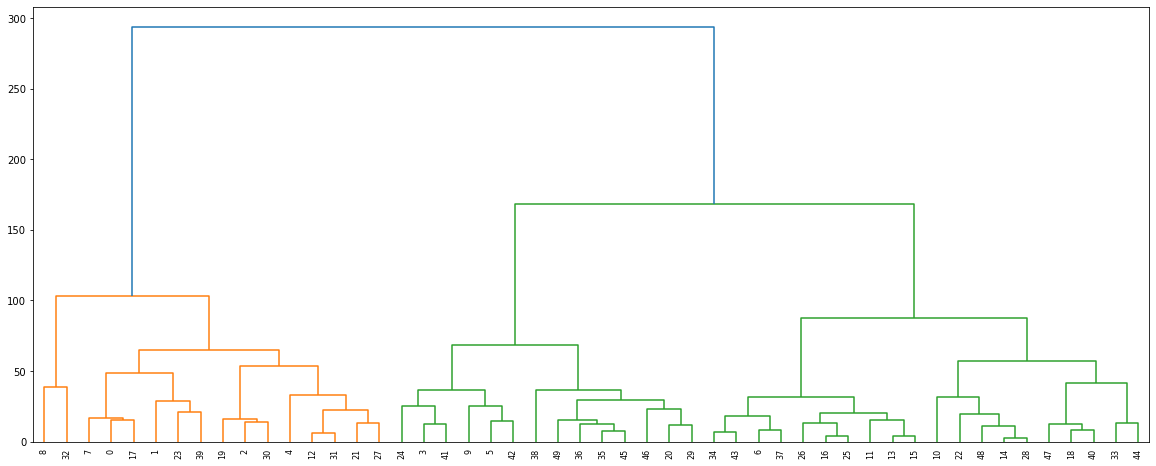

In [24]:
plt.figure(figsize=(20,8))
cd1=sch.dendrogram(sch.linkage(cd_scaler,method='complete'))

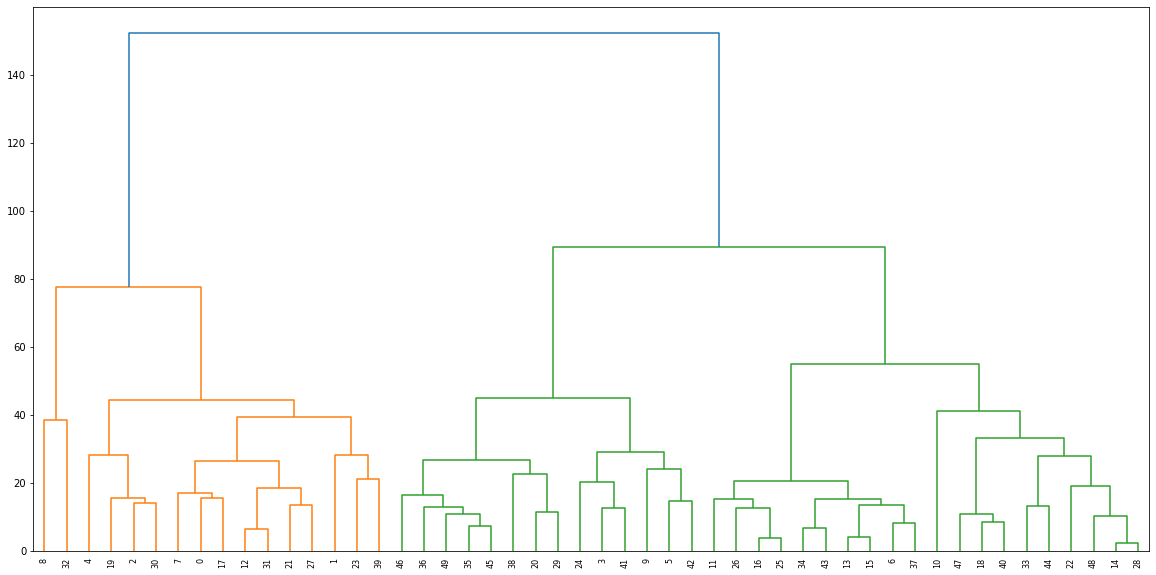

In [26]:
plt.figure(figsize=(20,10))
cd1=sch.dendrogram(sch.linkage(cd_scaler,method='average'))

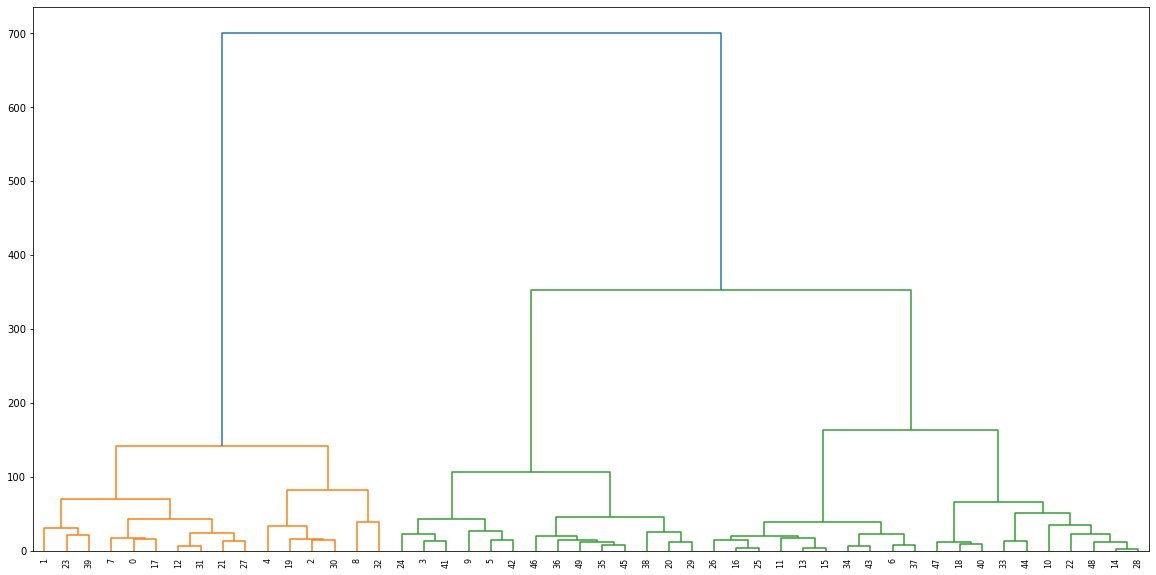

In [27]:
plt.figure(figsize=(20,10))
cd1=sch.dendrogram(sch.linkage(cd_scaler,method='ward'))

In [28]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [29]:
y_hc=hc.fit_predict(cd_scaler)
y_hc

array([1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [31]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,1
1,1
2,1
3,2
4,1
5,2
6,0
7,1
8,3
9,2


In [44]:
cd['clusters']=clusters

In [47]:
cd['clusters'].head()

0    1
1    1
2    1
3    2
4    1
Name: clusters, dtype: int64

In [48]:
cd['clusters'].value_counts()

0    20
1    14
2    14
3     2
Name: clusters, dtype: int64

In [49]:
cd[cd['clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0


In [50]:
cd[cd['clusters']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
7,Delaware,5.9,238,72,15.8,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
23,Mississippi,16.1,259,44,17.1,1


In [51]:
cd[cd['clusters']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
3,Arkansas,8.8,190,50,19.5,2
5,Colorado,7.9,204,78,38.7,2
9,Georgia,17.4,211,60,25.8,2
20,Massachusetts,4.4,149,85,16.3,2
24,Missouri,9.0,178,70,28.2,2
29,New Jersey,7.4,159,89,18.8,2
35,Oklahoma,6.6,151,68,20.0,2
36,Oregon,4.9,159,67,29.3,2
38,Rhode Island,3.4,174,87,8.3,2
41,Tennessee,13.2,188,59,26.9,2


In [52]:
cd[cd['clusters']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
8,Florida,15.4,335,80,31.9,3
32,North Carolina,13.0,337,45,16.1,3


In [53]:
cd.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.270000,87.550000,59.750000,14.390000
1,1,11.471429,263.500000,69.142857,29.000000
2,2,8.214286,173.285714,70.642857,22.842857
3,3,14.200000,336.000000,62.500000,24.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

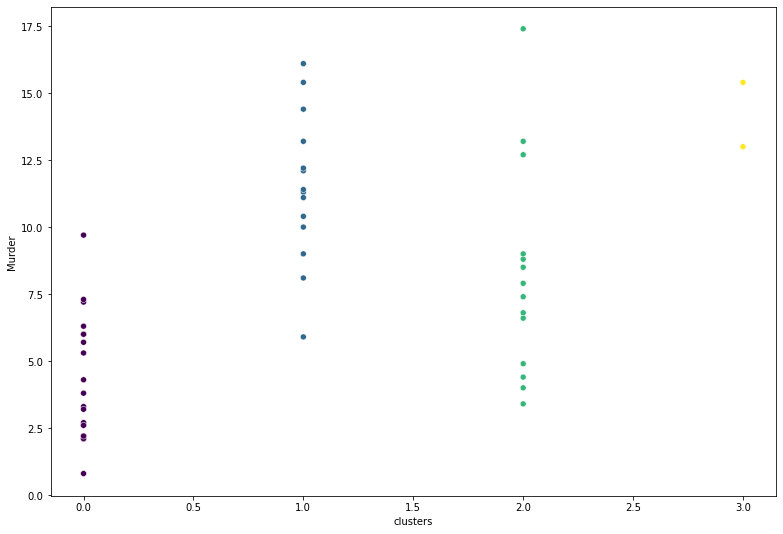

In [55]:
plt.figure(figsize=(13,9))
sn.scatterplot(cd['clusters'],cd['Murder'],c=hc.labels_)
plt.show